<a href="https://colab.research.google.com/github/Lzhenghong/Mini-ML-Projects/blob/main/Time%20Series%20Forecasting/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-08-17 16:01:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.004s  

2022-08-17 16:01:25 (39.6 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'],
                 index_col=['Date'])
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [ ]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


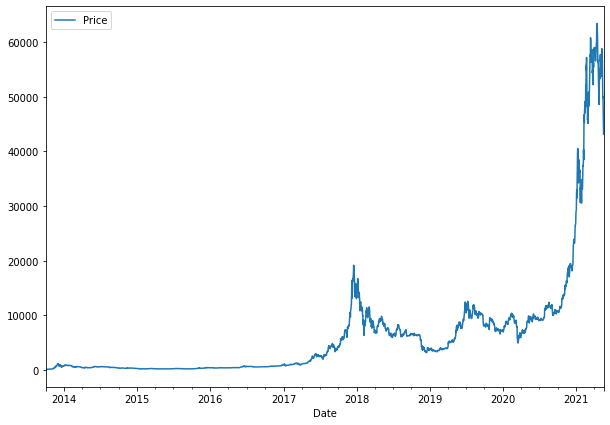

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))

In [ ]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader) # skip column header
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

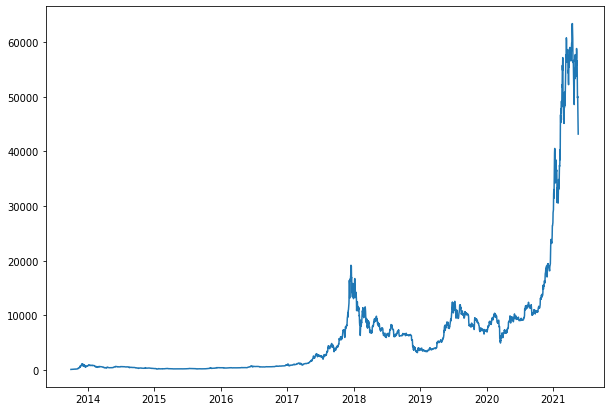

In [ ]:
import numpy as np

plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
btc_price = bitcoin_prices.Price.to_numpy()

split_size = int(0.8*len(btc_price))

x_train, y_train = timesteps[:split_size], btc_price[:split_size]
x_test, y_test = timesteps[split_size:], btc_price[split_size:]

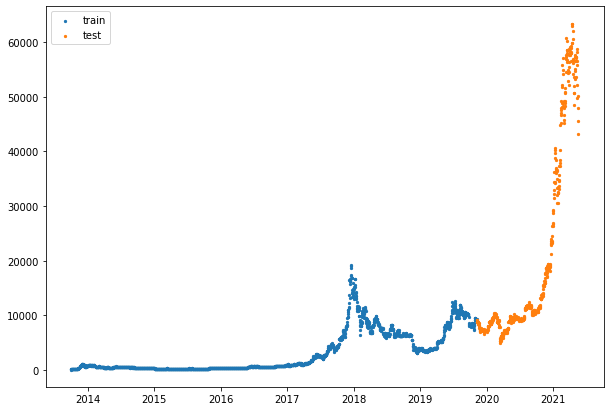

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, s=5, label='train')
plt.scatter(x_test, y_test, s=5, label='test')
plt.legend()
plt.show()

In [ ]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  if label:
    plt.legend()
  plt.grid(True)

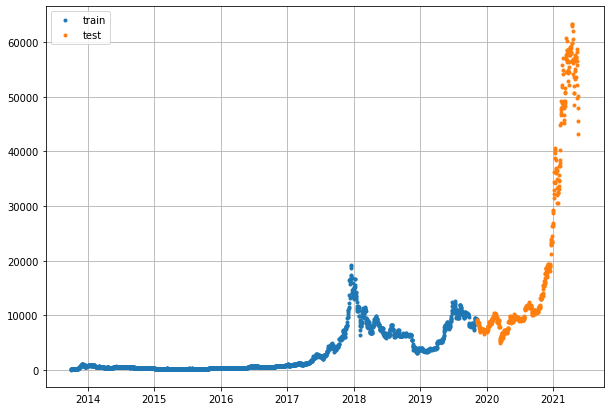

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(x_train, y_train, label='train')
plot_time_series(x_test, y_test, label='test')

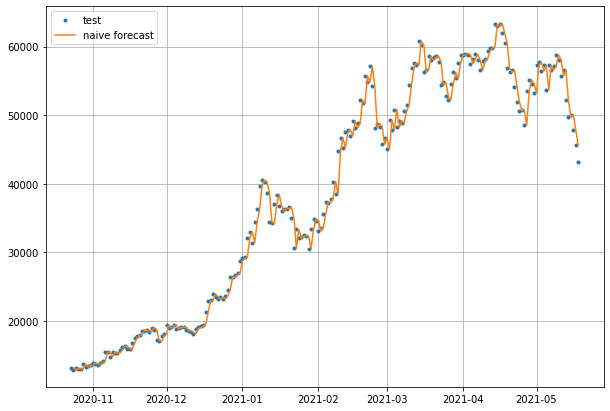

In [ ]:
# Naive forecast
naive_forecast = y_test[:-1]
plt.figure(figsize=(10,7))
#plot_time_series(x_train, y_train, label='train')
plot_time_series(x_test, y_test, start=350,  label='test')
plot_time_series(x_test[1:], naive_forecast, start=350, format='-', label='naive forecast')

In [ ]:
# Evaluating time series model (MASE)
import tensorflow as tf

def MASE(y_true, y_pred):
  # Assume no seasonality
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  return mae / mae_naive_no_season

In [ ]:
MASE(y_test[1:], naive_forecast).numpy()

0.9995699939182624

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rsme = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = MASE(y_true, y_pred)

  # Account for different sized metrics
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rsme = tf.reduce_mean(rsme)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {
      'mae': mae.numpy(),
      'mse': mse.numpy(),
      'rsme': rsme.numpy(),
      'mape': mape.numpy(),
      'mase': mase.numpy()
  }

In [ ]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rsme': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
# windowing our dataset
horizon = 1
window_size =7

In [ ]:
# label window data
def get_labelled_window(x, horizon=horizon):
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Create fucntion to view numpy array as sliding window:
def make_windows(x, window_size=window_size,horizon=horizon):
  # create window of specific window size
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # create 2D array of multiple window steps
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  # index on time series with 2D array
  windowed_array = x[window_indexes]

  # get labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(btc_prices)

In [ ]:
# Turning windows into train and test sets
def make_train_test_split(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

In [ ]:
import os

# modelcheckpoint callback
def create_model_checkpoint(model_name, save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

In [ ]:
from tensorflow.keras import layers

tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(horizon, activation='linear')
], name='model_1_dense')

model1.compile(loss='mae',
               optimizer='Adam',
               metrics=['mae', 'mse'])

history1 = model1.fit(train_windows,
                      train_labels,
                      epochs=100,
                      batch_size=128,
                      validation_data=(test_windows, test_labels),
                      callbacks=[create_model_checkpoint(model1.name)])

Epoch 1/100
18/18 [==============================] - 1s 33ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 0s 25ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
Epoch 3/100
18/18 [==============================] - 0s 26ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.6094 - val_loss: 923.2862 - val_mae: 923.2861 - val_mse: 2868220.7500
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5781 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.5000
Epoch 5/100
18/18 [==============================] - 0s 25ms/step - loss: 165.0894 - mae: 165.0894 - mse: 145490.7812 - val_loss: 895.2237 - val_mae: 895.2237 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 0s 26ms/step - loss: 158.5

In [ ]:
# Make forecast with model
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model1 = tf.keras.models.load_model('model_experiments/model_1_dense')
model1_preds = make_preds(model1, test_windows)
model1_results = evaluate_preds(tf.squeeze(test_labels), model1_preds)
model1_results

{'mae': 568.95105,
 'mse': 1171743.8,
 'rsme': 1082.4711,
 'mape': 2.5448983,
 'mase': 0.9994894}

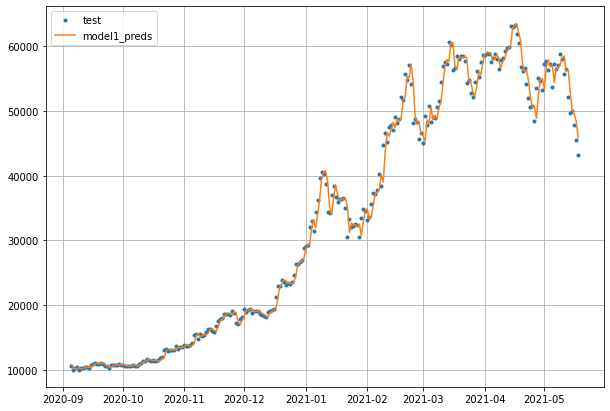

In [ ]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(x_test[-len(test_windows):], test_labels[:, 0], start=offset, label='test')
plot_time_series(x_test[-len(test_windows):], model1_preds, format='-', start=offset, label='model1_preds')

In [ ]:
test_labels[:10], model1_preds[:10]

(array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102],
        [8656.97092235],
        [8500.64355816],
        [8469.2608989 ],
        [8537.33965197],
        [8205.80636599]]), <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.71 , 8769.887, 9015.711, 8795.519, 8723.811, 8730.111,
        8691.952, 8502.054, 8460.961, 8516.548], dtype=float32)>)

In [ ]:
# 30 day window 
horizon = 1
window_size=30
full_windows, full_labels = make_windows(btc_price, window_size, horizon)
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

In [ ]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(horizon)
], name='model_2_dense')

model2.compile(loss='mae',
               optimizer='Adam',
               metrics=['mae', 'mse'])

history2 = model2.fit(train_windows,
                      train_labels,
                      epochs=100,
                      batch_size=128,
                      validation_data=(test_windows, test_labels),
                      callbacks=[create_model_checkpoint(model2.name)])

Epoch 1/100
18/18 [==============================] - 2s 59ms/step - loss: 1097.0399 - mae: 1097.0399 - mse: 4741506.0000 - val_loss: 3900.2537 - val_mae: 3900.2537 - val_mse: 32752730.0000
Epoch 2/100
18/18 [==============================] - 1s 43ms/step - loss: 428.0732 - mae: 428.0732 - mse: 811548.2500 - val_loss: 1587.0745 - val_mae: 1587.0745 - val_mse: 6817661.5000
Epoch 3/100
18/18 [==============================] - 1s 43ms/step - loss: 279.7655 - mae: 279.7655 - mse: 363083.0625 - val_loss: 1220.6888 - val_mae: 1220.6888 - val_mse: 4447002.0000
Epoch 4/100
18/18 [==============================] - 1s 44ms/step - loss: 224.3637 - mae: 224.3637 - mse: 225072.2188 - val_loss: 1160.1572 - val_mae: 1160.1572 - val_mse: 3837504.2500
Epoch 5/100
18/18 [==============================] - 1s 44ms/step - loss: 187.9681 - mae: 187.9681 - mse: 173777.0312 - val_loss: 1007.6487 - val_mae: 1007.6487 - val_mse: 3224229.0000
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss

In [ ]:
model2 = tf.keras.models.load_model('model_experiments/model_2_dense')
model2_preds = make_preds(model2, test_windows)
model2_results = evaluate_preds(tf.squeeze(test_labels), model2_preds)
model2_results

{'mae': 605.8741,
 'mse': 1273360.8,
 'rsme': 1128.4329,
 'mape': 2.726445,
 'mase': 1.0590738}

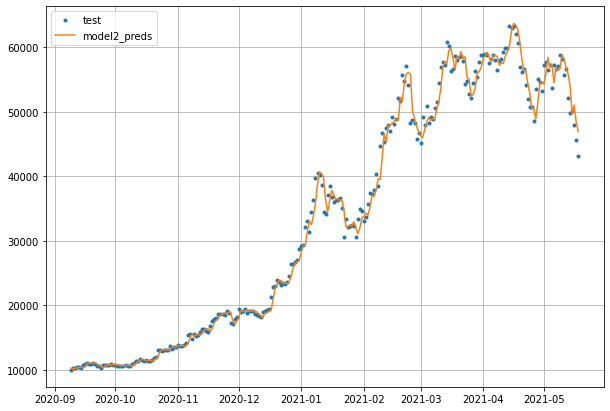

In [ ]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(x_test[-len(test_windows):], test_labels[:, 0], start=offset, label='test')
plot_time_series(x_test[-len(test_windows):], model2_preds, format='-', start=offset, label='model2_preds')

In [ ]:
# window 30, horizon 7
horizon = 7
window_size = 30
full_windows, full_labels = make_windows(btc_price, window_size, horizon)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

In [ ]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(horizon)
], name='model_3_dense')

model3.compile(loss='mae',
               optimizer='Adam',
               metrics=['mae', 'mse'])

history3 = model3.fit(train_windows,
                      train_labels,
                      epochs=100,
                      batch_size=128,
                      validation_data=(test_windows, test_labels),
                      callbacks=[create_model_checkpoint(model3.name)])

Epoch 1/100
18/18 [==============================] - 2s 74ms/step - loss: 1476.6752 - mae: 1476.6752 - mse: 10390733.0000 - val_loss: 3088.5613 - val_mae: 3088.5613 - val_mse: 24386346.0000
Epoch 2/100
18/18 [==============================] - 1s 68ms/step - loss: 552.8943 - mae: 552.8943 - mse: 1336176.8750 - val_loss: 2462.4548 - val_mae: 2462.4548 - val_mse: 17112268.0000
Epoch 3/100
18/18 [==============================] - 1s 63ms/step - loss: 435.1978 - mae: 435.1978 - mse: 893449.0000 - val_loss: 2283.1484 - val_mae: 2283.1484 - val_mse: 14950889.0000
Epoch 4/100
18/18 [==============================] - 1s 45ms/step - loss: 391.9787 - mae: 391.9787 - mse: 745983.8125 - val_loss: 1975.1218 - val_mae: 1975.1218 - val_mse: 11680637.0000
Epoch 5/100
18/18 [==============================] - 0s 9ms/step - loss: 357.9485 - mae: 357.9485 - mse: 627137.9375 - val_loss: 2000.1556 - val_mae: 2000.1556 - val_mse: 11665231.0000
Epoch 6/100
18/18 [==============================] - 0s 26ms/step 

In [ ]:
model3 = tf.keras.models.load_model('model_experiments/model_3_dense')
model3_preds = make_preds(model3, test_windows)
model3_results = evaluate_preds(tf.squeeze(test_labels), model3_preds)
model3_results

{'mae': 1237.5063,
 'mse': 5405198.5,
 'rsme': 1425.7478,
 'mape': 5.5588784,
 'mase': 2.2020733}

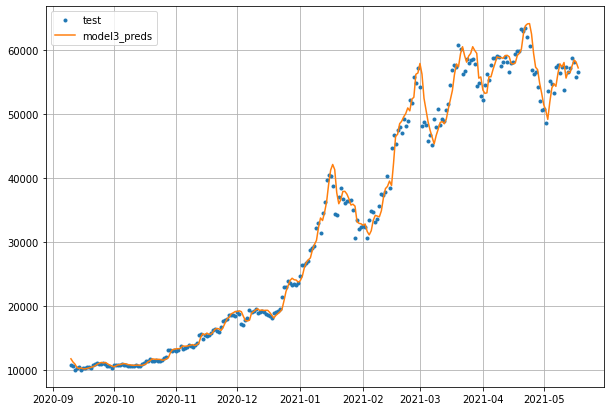

In [ ]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(x_test[-len(test_windows):], test_labels[:, 0], start=offset, label='test')
plot_time_series(x_test[-len(test_windows):], tf.reduce_mean(model3_preds, axis=1), 
                 format='-', start=offset, label='model3_preds')

In [ ]:
# Conv1D
horizon = 1
window_size = 7
full_windows, full_labels = make_windows(btc_price, window_size, horizon)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [ ]:
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, padding='causal', activation='relu'),
    layers.Dense(horizon)
], name='model_4_Conv1D')

model4.compile(loss='mae',
               optimizer='Adam',
               metrics=['mae', 'mse'])

history4 = model4.fit(train_windows,
                      train_labels,
                      epochs=100,
                      batch_size=128,
                      validation_data=(test_windows, test_labels),
                      callbacks=[create_model_checkpoint(model4.name)])

Epoch 1/100
18/18 [==============================] - 10s 55ms/step - loss: 1207.3817 - mae: 1207.3817 - mse: 5128398.0000 - val_loss: 2320.6218 - val_mae: 2320.6218 - val_mse: 13063541.0000
Epoch 2/100
18/18 [==============================] - 1s 36ms/step - loss: 316.2171 - mae: 316.2171 - mse: 408753.9375 - val_loss: 1467.2799 - val_mae: 1467.2799 - val_mse: 5375009.5000
Epoch 3/100
18/18 [==============================] - 1s 37ms/step - loss: 192.6853 - mae: 192.6853 - mse: 187429.8281 - val_loss: 1164.7074 - val_mae: 1164.7074 - val_mse: 3801948.0000
Epoch 4/100
18/18 [==============================] - 1s 39ms/step - loss: 177.3535 - mae: 177.3535 - mse: 166088.1562 - val_loss: 981.6695 - val_mae: 981.6695 - val_mse: 3154571.5000
Epoch 5/100
18/18 [==============================] - 1s 37ms/step - loss: 172.3467 - mae: 172.3467 - mse: 159527.5469 - val_loss: 960.8708 - val_mae: 960.8708 - val_mse: 3055978.0000
Epoch 6/100
18/18 [==============================] - 1s 70ms/step - loss: 

In [ ]:
model4 = tf.keras.models.load_model('model_experiments/model_4_Conv1D')
model4_preds = make_preds(model4, test_windows)
model4_results = evaluate_preds(tf.squeeze(test_labels), model4_preds)
model4_results

{'mae': 570.82837,
 'mse': 1176671.2,
 'rsme': 1084.7448,
 'mape': 2.5593357,
 'mase': 1.0027874}

In [ ]:
# LSTM
tf.random.set_seed(42)

inputs = layers.Input(shape=(window_size,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation='relu')(x)
output = layers.Dense(horizon)(x)
model5 = tf.keras.Model(inputs, output, name='model_5_LSTM')

model5.compile(loss='mae',
               optimizer='Adam',
               metrics=['mae', 'mse'])

history5 = model5.fit(train_windows,
                      train_labels,
                      epochs=100,
                      batch_size=128,
                      validation_data=(test_windows, test_labels),
                      callbacks=[create_model_checkpoint(model5.name)])

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 2405.3933 - mae: 2405.3933 - mse: 14310813.0000

18/18 [==============================] - 5s 148ms/step - loss: 2323.6082 - mae: 2323.6082 - mse: 13451164.0000 - val_loss: 9222.6523 - val_mae: 9222.6523 - val_mse: 150544848.0000
Epoch 2/100
10/18 [===============>..............] - ETA: 0s - loss: 989.3721 - mae: 989.3721 - mse: 2641875.5000  

18/18 [==============================] - 2s 119ms/step - loss: 695.4739 - mae: 695.4739 - mse: 1664331.0000 - val_loss: 1486.0555 - val_mae: 1486.0555 - val_mse: 6266154.5000
Epoch 3/100
11/18 [=================>............] - ETA: 0s - loss: 270.4985 - mae: 270.4985 - mse: 286965.4688

18/18 [==============================] - 2s 99ms/step - loss: 237.3967 - mae: 237.3967 - mse: 238510.3281 - val_loss: 1298.9084 - val_mae: 1298.9084 - val_mse: 4394857.5000
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 196.5330 - mae: 196.5330 - mse: 197479.2500

18/18 [==============================] - 2s 98ms/step - loss: 181.9180 - mae: 181.9180 - mse: 168791.5625 - val_loss: 966.6431 - val_mae: 966.6431 - val_mse: 3159459.2500
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 173.4022 - mae: 173.4022 - mse: 159026.5625 - val_loss: 970.9295 - val_mae: 970.9295 - val_mse: 3095508.5000
Epoch 6/100
10/18 [===============>..............] - ETA: 0s - loss: 169.4068 - mae: 169.4068 - mse: 138980.6875

18/18 [==============================] - 2s 125ms/step - loss: 173.5414 - mae: 173.5414 - mse: 154012.8281 - val_loss: 941.4746 - val_mae: 941.4746 - val_mse: 2827413.2500
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 171.3403 - mae: 171.3403 - mse: 158090.1406

18/18 [==============================] - 2s 130ms/step - loss: 170.3566 - mae: 170.3566 - mse: 155902.1719 - val_loss: 898.5215 - val_mae: 898.5215 - val_mse: 2614158.7500
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 157.6712 - mae: 157.6712 - mse: 136152.3125 - val_loss: 914.8642 - val_mae: 914.8642 - val_mse: 2657904.7500
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 166.5143 - mae: 166.5143 - mse: 146057.1719 - val_loss: 1079.0776 - val_mae: 1079.0776 - val_mse: 3372638.7500
Epoch 10/100
10/18 [===============>..............] - ETA: 0s - loss: 162.4181 - mae: 162.4181 - mse: 130218.3594

18/18 [==============================] - 2s 100ms/step - loss: 162.3369 - mae: 162.3369 - mse: 134529.5469 - val_loss: 877.1690 - val_mae: 877.1690 - val_mse: 2416075.5000
Epoch 11/100
18/18 [==============================] - 0s 8ms/step - loss: 163.0841 - mae: 163.0841 - mse: 142166.6875 - val_loss: 924.1126 - val_mae: 924.1127 - val_mse: 2880439.5000
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 168.5598 - mae: 168.5598 - mse: 149940.1094 - val_loss: 941.6025 - val_mae: 941.6025 - val_mse: 2945409.0000
Epoch 13/100
18/18 [==============================] - 0s 7ms/step - loss: 166.4726 - mae: 166.4726 - mse: 149715.0000 - val_loss: 934.8436 - val_mae: 934.8436 - val_mse: 2894061.0000
Epoch 14/100
18/18 [==============================] - 0s 7ms/step - loss: 163.9537 - mae: 163.9537 - mse: 144073.3438 - val_loss: 920.2160 - val_mae: 920.2160 - val_mse: 2636641.0000
Epoch 15/100
11/18 [=================>............] - ETA: 0s - loss: 151.0251 - mae: 151.0251 -

18/18 [==============================] - 2s 100ms/step - loss: 152.9470 - mae: 152.9470 - mse: 123160.4453 - val_loss: 856.2653 - val_mae: 856.2653 - val_mse: 2465898.5000
Epoch 16/100
18/18 [==============================] - 0s 7ms/step - loss: 147.4420 - mae: 147.4420 - mse: 116629.3828 - val_loss: 898.9914 - val_mae: 898.9914 - val_mse: 2276295.7500
Epoch 17/100
18/18 [==============================] - 0s 8ms/step - loss: 151.0533 - mae: 151.0533 - mse: 118490.4844 - val_loss: 943.1418 - val_mae: 943.1418 - val_mse: 2741249.7500
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 157.8232 - mae: 157.8232 - mse: 135940.5000 - val_loss: 924.0046 - val_mae: 924.0046 - val_mse: 2666361.0000
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 155.9198 - mae: 155.9198 - mse: 133608.1875 - val_loss: 911.4753 - val_mae: 911.4753 - val_mse: 2607185.5000
Epoch 20/100
18/18 [==============================] - 0s 7ms/step - loss: 155.6456 - mae: 155.64

18/18 [==============================] - 2s 100ms/step - loss: 146.8467 - mae: 146.8467 - mse: 120590.7266 - val_loss: 845.2782 - val_mae: 845.2782 - val_mse: 2279688.0000
Epoch 26/100
10/18 [===============>..............] - ETA: 0s - loss: 148.7083 - mae: 148.7083 - mse: 114816.8516

18/18 [==============================] - 2s 98ms/step - loss: 145.9843 - mae: 145.9843 - mse: 118008.3594 - val_loss: 818.6807 - val_mae: 818.6807 - val_mse: 2195707.0000
Epoch 27/100
11/18 [=================>............] - ETA: 0s - loss: 153.2509 - mae: 153.2509 - mse: 131652.0938

18/18 [==============================] - 2s 101ms/step - loss: 144.4289 - mae: 144.4289 - mse: 116627.6328 - val_loss: 804.3279 - val_mae: 804.3279 - val_mse: 2141244.2500
Epoch 28/100
11/18 [=================>............] - ETA: 0s - loss: 145.3607 - mae: 145.3607 - mse: 115623.1719

18/18 [==============================] - 2s 119ms/step - loss: 142.4610 - mae: 142.4610 - mse: 115313.7578 - val_loss: 789.0859 - val_mae: 789.0859 - val_mse: 2095049.6250
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 141.8739 - mae: 141.8739 - mse: 112794.9297 - val_loss: 806.6758 - val_mae: 806.6758 - val_mse: 2090220.2500
Epoch 30/100
18/18 [==============================] - 0s 7ms/step - loss: 142.0521 - mae: 142.0521 - mse: 112808.3359 - val_loss: 794.8836 - val_mae: 794.8837 - val_mse: 2040775.6250
Epoch 31/100
10/18 [===============>..............] - ETA: 0s - loss: 142.2655 - mae: 142.2655 - mse: 112298.5859

18/18 [==============================] - 2s 97ms/step - loss: 138.4690 - mae: 138.4690 - mse: 107980.4766 - val_loss: 773.2812 - val_mae: 773.2812 - val_mse: 1972856.3750
Epoch 32/100
11/18 [=================>............] - ETA: 0s - loss: 137.6196 - mae: 137.6196 - mse: 98855.5234

18/18 [==============================] - 2s 98ms/step - loss: 137.1986 - mae: 137.1986 - mse: 106284.4766 - val_loss: 772.2625 - val_mae: 772.2625 - val_mse: 1948036.6250
Epoch 33/100
18/18 [==============================] - 0s 8ms/step - loss: 135.9342 - mae: 135.9342 - mse: 103751.0312 - val_loss: 786.4805 - val_mae: 786.4805 - val_mse: 1961976.8750
Epoch 34/100
11/18 [=================>............] - ETA: 0s - loss: 142.0283 - mae: 142.0283 - mse: 118156.6328

18/18 [==============================] - 2s 97ms/step - loss: 136.1931 - mae: 136.1931 - mse: 104538.6016 - val_loss: 744.4506 - val_mae: 744.4506 - val_mse: 1886289.3750
Epoch 35/100
18/18 [==============================] - 0s 8ms/step - loss: 133.4513 - mae: 133.4513 - mse: 102255.5938 - val_loss: 756.2970 - val_mae: 756.2970 - val_mse: 1852667.6250
Epoch 36/100
10/18 [===============>..............] - ETA: 0s - loss: 128.8641 - mae: 128.8641 - mse: 99836.8750 

18/18 [==============================] - 2s 99ms/step - loss: 134.0992 - mae: 134.0992 - mse: 103215.3203 - val_loss: 735.1729 - val_mae: 735.1729 - val_mse: 1840291.6250
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 130.6932 - mae: 130.6932 - mse: 99329.6328 - val_loss: 745.9099 - val_mae: 745.9099 - val_mse: 1796193.8750
Epoch 38/100
10/18 [===============>..............] - ETA: 0s - loss: 137.2887 - mae: 137.2887 - mse: 103603.9531

18/18 [==============================] - 2s 139ms/step - loss: 129.2891 - mae: 129.2891 - mse: 96651.1484 - val_loss: 717.2498 - val_mae: 717.2498 - val_mse: 1739678.7500
Epoch 39/100
18/18 [==============================] - 0s 7ms/step - loss: 129.6088 - mae: 129.6088 - mse: 97402.8438 - val_loss: 719.0665 - val_mae: 719.0665 - val_mse: 1764965.1250
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 129.6111 - mae: 129.6111 - mse: 96268.3438 - val_loss: 732.0632 - val_mae: 732.0632 - val_mse: 1722418.6250
Epoch 41/100
10/18 [===============>..............] - ETA: 0s - loss: 133.3553 - mae: 133.3553 - mse: 103149.5156

18/18 [==============================] - 2s 126ms/step - loss: 127.1393 - mae: 127.1393 - mse: 94059.6016 - val_loss: 702.9354 - val_mae: 702.9354 - val_mse: 1654539.1250
Epoch 42/100
11/18 [=================>............] - ETA: 0s - loss: 126.7599 - mae: 126.7599 - mse: 98185.7188

18/18 [==============================] - 2s 100ms/step - loss: 125.6113 - mae: 125.6113 - mse: 93062.1250 - val_loss: 700.8702 - val_mae: 700.8702 - val_mse: 1632477.6250
Epoch 43/100
18/18 [==============================] - 0s 7ms/step - loss: 125.9959 - mae: 125.9959 - mse: 91461.9453 - val_loss: 704.3682 - val_mae: 704.3682 - val_mse: 1634230.3750
Epoch 44/100
10/18 [===============>..............] - ETA: 0s - loss: 119.9876 - mae: 119.9876 - mse: 82793.8906

18/18 [==============================] - 2s 99ms/step - loss: 125.2241 - mae: 125.2241 - mse: 91130.9141 - val_loss: 698.7766 - val_mae: 698.7766 - val_mse: 1611164.0000
Epoch 45/100
11/18 [=================>............] - ETA: 0s - loss: 121.2221 - mae: 121.2221 - mse: 81012.4062

18/18 [==============================] - 2s 97ms/step - loss: 122.5007 - mae: 122.5007 - mse: 87852.5938 - val_loss: 683.0590 - val_mae: 683.0590 - val_mse: 1587455.5000
Epoch 46/100
11/18 [=================>............] - ETA: 0s - loss: 130.6197 - mae: 130.6197 - mse: 103183.5234

18/18 [==============================] - 2s 99ms/step - loss: 124.4726 - mae: 124.4726 - mse: 89115.8672 - val_loss: 679.1873 - val_mae: 679.1873 - val_mse: 1563189.8750
Epoch 47/100
18/18 [==============================] - 0s 8ms/step - loss: 122.1862 - mae: 122.1862 - mse: 88216.1328 - val_loss: 705.4241 - val_mae: 705.4241 - val_mse: 1601601.6250
Epoch 48/100
11/18 [=================>............] - ETA: 0s - loss: 120.7927 - mae: 120.7927 - mse: 84421.3828

18/18 [==============================] - 2s 97ms/step - loss: 122.0458 - mae: 122.0458 - mse: 86790.4453 - val_loss: 677.0784 - val_mae: 677.0784 - val_mse: 1531911.8750
Epoch 49/100
11/18 [=================>............] - ETA: 0s - loss: 127.1128 - mae: 127.1128 - mse: 101568.7031

18/18 [==============================] - 2s 100ms/step - loss: 121.1548 - mae: 121.1548 - mse: 86714.9219 - val_loss: 674.6848 - val_mae: 674.6848 - val_mse: 1519799.5000
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 122.8890 - mae: 122.8890 - mse: 86371.2188 - val_loss: 691.4816 - val_mae: 691.4816 - val_mse: 1621967.2500
Epoch 51/100
18/18 [==============================] - 0s 8ms/step - loss: 122.2994 - mae: 122.2994 - mse: 84443.6250 - val_loss: 737.3929 - val_mae: 737.3929 - val_mse: 1666765.1250
Epoch 52/100
10/18 [===============>..............] - ETA: 0s - loss: 126.4967 - mae: 126.4967 - mse: 89806.3594

18/18 [==============================] - 2s 129ms/step - loss: 121.2944 - mae: 121.2944 - mse: 86066.5625 - val_loss: 657.2365 - val_mae: 657.2365 - val_mse: 1474019.0000
Epoch 53/100
11/18 [=================>............] - ETA: 0s - loss: 118.0734 - mae: 118.0734 - mse: 83804.3281

18/18 [==============================] - 2s 100ms/step - loss: 119.7668 - mae: 119.7668 - mse: 85063.6797 - val_loss: 652.7970 - val_mae: 652.7970 - val_mse: 1469353.0000
Epoch 54/100
18/18 [==============================] - 0s 8ms/step - loss: 120.1222 - mae: 120.1222 - mse: 85026.6719 - val_loss: 654.4439 - val_mae: 654.4439 - val_mse: 1453347.0000
Epoch 55/100
10/18 [===============>..............] - ETA: 0s - loss: 127.0469 - mae: 127.0469 - mse: 97727.2891 

18/18 [==============================] - 2s 99ms/step - loss: 119.2566 - mae: 119.2566 - mse: 84235.1953 - val_loss: 647.2831 - val_mae: 647.2831 - val_mse: 1439385.5000
Epoch 56/100
10/18 [===============>..............] - ETA: 0s - loss: 124.2149 - mae: 124.2149 - mse: 98407.2266 

18/18 [==============================] - 2s 100ms/step - loss: 120.0544 - mae: 120.0544 - mse: 85208.3594 - val_loss: 643.7808 - val_mae: 643.7808 - val_mse: 1432413.0000
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 123.1243 - mae: 123.1243 - mse: 86718.4453 - val_loss: 671.1797 - val_mae: 671.1797 - val_mse: 1477136.8750
Epoch 58/100
10/18 [===============>..............] - ETA: 0s - loss: 120.0865 - mae: 120.0865 - mse: 90863.8672

18/18 [==============================] - 2s 100ms/step - loss: 118.4059 - mae: 118.4059 - mse: 83857.0469 - val_loss: 640.2656 - val_mae: 640.2656 - val_mse: 1413273.5000
Epoch 59/100
18/18 [==============================] - 0s 8ms/step - loss: 117.7119 - mae: 117.7119 - mse: 82616.7344 - val_loss: 645.3837 - val_mae: 645.3837 - val_mse: 1449263.0000
Epoch 60/100
10/18 [===============>..............] - ETA: 0s - loss: 120.4500 - mae: 120.4500 - mse: 84969.8594

18/18 [==============================] - 2s 98ms/step - loss: 118.5346 - mae: 118.5346 - mse: 81290.9062 - val_loss: 638.7429 - val_mae: 638.7429 - val_mse: 1401002.2500
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 118.3129 - mae: 118.3129 - mse: 83193.3750 - val_loss: 689.4144 - val_mae: 689.4144 - val_mse: 1512748.3750
Epoch 62/100
18/18 [==============================] - 0s 8ms/step - loss: 121.4350 - mae: 121.4350 - mse: 81419.4453 - val_loss: 748.5565 - val_mae: 748.5565 - val_mse: 1786019.2500
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 123.1006 - mae: 123.1006 - mse: 86016.2266 - val_loss: 651.8298 - val_mae: 651.8298 - val_mse: 1418997.8750
Epoch 64/100
18/18 [==============================] - 0s 8ms/step - loss: 115.9679 - mae: 115.9679 - mse: 81176.8672 - val_loss: 672.9166 - val_mae: 672.9166 - val_mse: 1467748.0000
Epoch 65/100
11/18 [=================>............] - ETA: 0s - loss: 120.7008 - mae: 120.7008 - mse: 

18/18 [==============================] - 2s 99ms/step - loss: 118.8341 - mae: 118.8341 - mse: 83323.3047 - val_loss: 631.7538 - val_mae: 631.7538 - val_mse: 1396571.8750
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 116.2212 - mae: 116.2212 - mse: 80563.0859 - val_loss: 634.5445 - val_mae: 634.5445 - val_mse: 1376238.3750
Epoch 67/100
18/18 [==============================] - ETA: 0s - loss: 116.1580 - mae: 116.1580 - mse: 81177.6484

18/18 [==============================] - 2s 100ms/step - loss: 116.1580 - mae: 116.1580 - mse: 81177.6484 - val_loss: 623.8932 - val_mae: 623.8932 - val_mse: 1357601.1250
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 115.5543 - mae: 115.5543 - mse: 79794.0156 - val_loss: 635.4929 - val_mae: 635.4929 - val_mse: 1408539.1250
Epoch 69/100
18/18 [==============================] - 0s 8ms/step - loss: 120.5866 - mae: 120.5866 - mse: 83005.6328 - val_loss: 626.3387 - val_mae: 626.3387 - val_mse: 1375137.2500
Epoch 70/100
10/18 [===============>..............] - ETA: 0s - loss: 115.4515 - mae: 115.4515 - mse: 85093.7891 

18/18 [==============================] - 2s 99ms/step - loss: 114.9188 - mae: 114.9188 - mse: 79743.3516 - val_loss: 619.3181 - val_mae: 619.3181 - val_mse: 1348408.0000
Epoch 71/100
18/18 [==============================] - 0s 8ms/step - loss: 114.8998 - mae: 114.8998 - mse: 79444.4609 - val_loss: 650.9373 - val_mae: 650.9373 - val_mse: 1404147.1250
Epoch 72/100
18/18 [==============================] - 0s 7ms/step - loss: 118.2033 - mae: 118.2033 - mse: 80784.2656 - val_loss: 630.5287 - val_mae: 630.5287 - val_mse: 1389130.3750
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 115.3612 - mae: 115.3612 - mse: 80023.2188 - val_loss: 623.0369 - val_mae: 623.0369 - val_mse: 1362779.1250
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 115.0345 - mae: 115.0345 - mse: 80069.8906 - val_loss: 623.0776 - val_mae: 623.0776 - val_mse: 1339281.8750
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 115.2057 - mae: 115.2057 - m

18/18 [==============================] - 2s 142ms/step - loss: 114.1402 - mae: 114.1402 - mse: 78923.9688 - val_loss: 614.4062 - val_mae: 614.4062 - val_mse: 1321707.2500
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 115.5973 - mae: 115.5973 - mse: 77964.8750 - val_loss: 689.8776 - val_mae: 689.8776 - val_mse: 1484028.1250
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 117.2611 - mae: 117.2611 - mse: 80703.7891 - val_loss: 645.2790 - val_mae: 645.2790 - val_mse: 1380985.1250
Epoch 79/100
10/18 [===============>..............] - ETA: 0s - loss: 112.2463 - mae: 112.2463 - mse: 70272.1641

18/18 [==============================] - 2s 99ms/step - loss: 114.1995 - mae: 114.1995 - mse: 78555.1484 - val_loss: 608.7159 - val_mae: 608.7159 - val_mse: 1312046.2500
Epoch 80/100
18/18 [==============================] - 0s 8ms/step - loss: 112.7125 - mae: 112.7125 - mse: 77826.6797 - val_loss: 614.9222 - val_mae: 614.9222 - val_mse: 1316068.3750
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 113.3684 - mae: 113.3684 - mse: 77013.3125 - val_loss: 634.8466 - val_mae: 634.8466 - val_mse: 1353791.8750
Epoch 82/100
10/18 [===============>..............] - ETA: 0s - loss: 123.8416 - mae: 123.8416 - mse: 97898.8672 

18/18 [==============================] - 2s 99ms/step - loss: 115.9701 - mae: 115.9701 - mse: 80798.4531 - val_loss: 607.8510 - val_mae: 607.8510 - val_mse: 1310004.2500
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 113.3599 - mae: 113.3599 - mse: 77364.0781 - val_loss: 628.8181 - val_mae: 628.8181 - val_mse: 1372628.6250
Epoch 84/100
18/18 [==============================] - 0s 8ms/step - loss: 114.4113 - mae: 114.4113 - mse: 77286.6094 - val_loss: 628.5579 - val_mae: 628.5579 - val_mse: 1336987.6250
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 114.8363 - mae: 114.8363 - mse: 77763.7812 - val_loss: 634.7715 - val_mae: 634.7715 - val_mse: 1349507.5000
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 115.5462 - mae: 115.5462 - mse: 79288.0938 - val_loss: 613.5223 - val_mae: 613.5223 - val_mse: 1306160.1250
Epoch 87/100
11/18 [=================>............] - ETA: 0s - loss: 116.9523 - mae: 116.9523 - mse: 

18/18 [==============================] - 2s 98ms/step - loss: 112.5059 - mae: 112.5059 - mse: 77122.9297 - val_loss: 604.7603 - val_mae: 604.7603 - val_mse: 1301087.5000
Epoch 88/100
10/18 [===============>..............] - ETA: 0s - loss: 118.3664 - mae: 118.3664 - mse: 90908.5234 

18/18 [==============================] - 2s 98ms/step - loss: 111.7706 - mae: 111.7706 - mse: 77141.2969 - val_loss: 601.5748 - val_mae: 601.5748 - val_mse: 1286722.7500
Epoch 89/100
18/18 [==============================] - 0s 8ms/step - loss: 111.8470 - mae: 111.8470 - mse: 75809.6328 - val_loss: 624.0131 - val_mae: 624.0131 - val_mse: 1322086.5000
Epoch 90/100
18/18 [==============================] - 0s 8ms/step - loss: 115.6354 - mae: 115.6354 - mse: 80153.7109 - val_loss: 662.9452 - val_mae: 662.9452 - val_mse: 1405283.7500
Epoch 91/100
18/18 [==============================] - 0s 8ms/step - loss: 116.1836 - mae: 116.1836 - mse: 80057.3125 - val_loss: 636.0310 - val_mae: 636.0310 - val_mse: 1382068.7500
Epoch 92/100
18/18 [==============================] - 0s 7ms/step - loss: 113.1700 - mae: 113.1700 - mse: 78196.5156 - val_loss: 606.0366 - val_mae: 606.0366 - val_mse: 1286721.3750
Epoch 93/100
10/18 [===============>..............] - ETA: 0s - loss: 111.9717 - mae: 111.9717 - mse: 

18/18 [==============================] - 2s 99ms/step - loss: 112.4748 - mae: 112.4748 - mse: 77981.4766 - val_loss: 599.8319 - val_mae: 599.8319 - val_mse: 1284409.1250
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 111.2637 - mae: 111.2637 - mse: 76411.6094 - val_loss: 601.3256 - val_mae: 601.3256 - val_mse: 1288764.7500
Epoch 95/100
11/18 [=================>............] - ETA: 0s - loss: 106.7242 - mae: 106.7242 - mse: 71542.6953 

18/18 [==============================] - 2s 97ms/step - loss: 111.0185 - mae: 111.0185 - mse: 76521.2891 - val_loss: 597.1485 - val_mae: 597.1485 - val_mse: 1275455.1250
Epoch 96/100
18/18 [==============================] - 0s 8ms/step - loss: 112.3787 - mae: 112.3787 - mse: 76603.7578 - val_loss: 601.1596 - val_mae: 601.1596 - val_mse: 1274792.6250
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 111.4700 - mae: 111.4700 - mse: 75130.8672 - val_loss: 626.1573 - val_mae: 626.1573 - val_mse: 1351349.1250
Epoch 98/100
18/18 [==============================] - 0s 8ms/step - loss: 111.7326 - mae: 111.7326 - mse: 76162.0078 - val_loss: 601.0142 - val_mae: 601.0142 - val_mse: 1286545.6250
Epoch 99/100
11/18 [=================>............] - ETA: 0s - loss: 109.1518 - mae: 109.1518 - mse: 66958.1719 

18/18 [==============================] - 2s 101ms/step - loss: 110.7480 - mae: 110.7480 - mse: 75896.9531 - val_loss: 594.6030 - val_mae: 594.6030 - val_mse: 1267231.8750
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 111.9943 - mae: 111.9943 - mse: 75638.7734 - val_loss: 595.9847 - val_mae: 595.9847 - val_mse: 1271473.0000


In [ ]:
model5 = tf.keras.models.load_model('model_experiments/model_5_LSTM')
model5_preds = make_preds(model5, test_windows)
model5_results = evaluate_preds(tf.squeeze(test_labels), model5_preds)
model5_results

{'mae': 594.60297,
 'mse': 1267231.9,
 'rsme': 1125.7139,
 'mape': 2.6717565,
 'mase': 1.0445527}

In [ ]:
# multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Add halving events to dataset
block_reward_1 = 50 # 3 Jan 2009
block_reward_2 = 25 # 8 Nov 2012
block_reward_3 =  12.5 # 9 Jul 2016
block_reward_4 = 6.25 # 18 May 2020

block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')

In [ ]:
# Create date ranges where specific block reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
# Add in block reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block reward'] = None
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

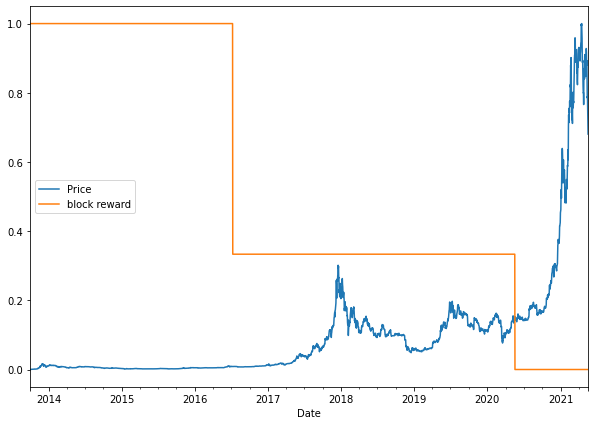

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price', 'block reward']]),
                                                  columns=bitcoin_prices_block.columns,
                                                  index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,7))

In [ ]:
horizon = 1
window_size = 7

In [ ]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()
for i in range(window_size): # shift values for each step in window size
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed['Price'].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
x = bitcoin_prices_windowed.dropna().drop('Price', axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

In [ ]:
split_size = int(len(x)*0.8)
x_train, y_train = x[:split_size], y[:split_size]
x_test, y_test = x[split_size:], y[split_size:]

In [ ]:
# multivariate model
tf.random.set_seed(42)

model6 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(horizon)
], name='model_6_dense_multivariate')

model6.compile(loss='mae',
               optimizer='Adam',
               metrics=['mae', 'mse'])

history6 = model6.fit(x_train,
                      y_train,
                      batch_size=128,
                      epochs=100,
                      validation_data=(x_test, y_test),
                      callbacks=[create_model_checkpoint(model6.name)])

Epoch 1/100
18/18 [==============================] - 1s 55ms/step - loss: 1234.6804 - mae: 1234.6804 - mse: 5282005.5000 - val_loss: 2061.9077 - val_mae: 2061.9077 - val_mse: 11377605.0000
Epoch 2/100
18/18 [==============================] - 1s 44ms/step - loss: 351.5053 - mae: 351.5053 - mse: 499358.0312 - val_loss: 1908.6733 - val_mae: 1908.6733 - val_mse: 8719443.0000
Epoch 3/100
18/18 [==============================] - 1s 42ms/step - loss: 235.4153 - mae: 235.4153 - mse: 276006.8125 - val_loss: 1329.0585 - val_mae: 1329.0585 - val_mse: 4991872.0000
Epoch 4/100
18/18 [==============================] - 48s 3s/step - loss: 208.6112 - mae: 208.6112 - mse: 219502.7188 - val_loss: 1102.1342 - val_mae: 1102.1342 - val_mse: 3934655.5000
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 196.5770 - mae: 196.5770 - mse: 204309.3750 - val_loss: 1107.8474 - val_mae: 1107.8474 - val_mse: 3822059.0000
Epoch 6/100
18/18 [==============================] - 1s 44ms/step - loss:

In [ ]:
model6 = tf.keras.models.load_model('model_experiments/model_6_dense_multivariate')
model6_preds = make_preds(model6, x_test)
model6_results = evaluate_preds(tf.squeeze(y_test), model6_preds)
model6_results

{'mae': 567.8899,
 'mse': 1164816.4,
 'rsme': 1079.2666,
 'mape': 2.5460758,
 'mase': 0.99762523}

In [ ]:
# Create NBeatsBlock custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=window_size, 
                                       theta_size=window_size+horizon, # backcast + forecast 
                                       horizon=horizon,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(window_size) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.48976913 -0.12239711  0.91753995  0.30589288  0.4072049  -0.07078186
 -0.8910993 ]
Forecast: -0.19478601217269897


In [ ]:
# Prepare data for N-BEAT algorithm using tf.data
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(window_size):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats['Price'].shift(periods=i+1)
bitcoin_prices_nbeats

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.654990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [ ]:
x = bitcoin_prices_nbeats.dropna().drop('Price', axis=1)
y = bitcoin_prices_nbeats.dropna()['Price']

split_size = int(len(x)*0.8)
x_train, y_train = x[:split_size], y[:split_size]
x_test, y_test = x[split_size:], y[split_size:]

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(x_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(x_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

batch_size = 1024

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Values from N-Beats paper
n_epochs = 5000
n_neurons = 512
n_layers = 4
n_stacks = 30

input_size = window_size * horizon
theta_size = input_size + horizon

In [ ]:
# Double residual stacking

%%time

tf.random.set_seed(42)

nbeats_block_layer = NBeatsBlock(input_size,
                                 theta_size,
                                 horizon,
                                 n_neurons,
                                 n_layers,
                                 name='InitialBlock')

# Create input to stack
stack_input = layers.Input(shape=(input_size), name='stack_input')

# Create initial backcast and ofrecast input
residuals, forecast = nbeats_block_layer(stack_input)

# Create stacks of block layers
for i, _ in enumerate(range(n_stacks-1)):
  # Use NBeatsBlock to calculate backcast and forecast
  backcast, block_forecast = NBeatsBlock(
      input_size,
      theta_size,
      horizon,
      n_neurons,
      n_layers,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in residuals

  # Create double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f'subtract_{i}')
  forecast = layers.add([forecast, block_forecast], name=f'add_{i}')

# Put stack model together
model7 = tf.keras.Model(stack_input, forecast, name='model_7_NBeats')
model7.compile(loss='mae',
               optimizer='Adam')

# Fit model with early stopping and ReduceLROnPlateau callbacks
model7.fit(train_dataset,
           epochs=n_epochs,
           validation_data=test_dataset,
           verbose=0,
           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                       patience=200,
                                                       restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                           patience=100,
                                                           verbose=1)])


Epoch 714: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 942: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1042: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 3min 50s, sys: 6.38 s, total: 3min 56s
Wall time: 5min 46s


In [ ]:
model7_preds = make_preds(model7, test_dataset)
model7_results = evaluate_preds(y_test, model7_preds)
model7_results

{'mae': 572.1128,
 'mse': 1171146.1,
 'rsme': 1082.1951,
 'mape': 2.5804524,
 'mase': 1.0050437}

In [ ]:
# Ensemble model
def get_ensemble_models(horizon=horizon,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fn=['mae', 'mse', 'mape']):
  ensemble_models = []
  for i in range(num_iter):
    for loss_function in loss_fn:
      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
          layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
          layers.Dense(horizon)
      ])

      model.compile(loss=loss_function,
                    optimizer='Adam',
                    metrics=['mae', 'mse'])
      
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                patience=100,
                                                                verbose=1)])
      
      ensemble_models.append(model)
  return ensemble_models

In [ ]:
%%time
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)


Epoch 931: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 409: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 509: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 177: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 947: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 895: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 172: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 289: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 389: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 908: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 334: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 434: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 256: ReduceLROnPlateau reducing l

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
%%time
ensemble_preds = make_ensemble_preds(ensemble_models, test_dataset)
ensemble_preds

CPU times: user 606 ms, sys: 25.6 ms, total: 632 ms
Wall time: 596 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8785.723,  8800.278,  9098.358, ..., 49763.574, 48647.38 ,
        46108.523],
       [ 8792.273,  8813.668,  9060.536, ..., 50094.62 , 47593.094,
        45865.97 ],
       [ 8808.443,  8777.689,  9027.759, ..., 49869.68 , 48506.152,
        45897.37 ],
       ...,
       [ 8829.275,  8730.214,  9034.569, ..., 50138.168, 48557.8  ,
        46575.457],
       [ 8736.973,  8727.444,  8993.957, ..., 49682.875, 48470.785,
        46712.67 ],
       [ 8795.199,  8784.987,  9077.272, ..., 49381.027, 48158.45 ,
        46441.727]], dtype=float32)>

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_results = evaluate_preds(y_test, ensemble_mean)
ensemble_results

{'mae': 567.48883,
 'mse': 1142778.5,
 'rsme': 1069.0082,
 'mape': 2.5836112,
 'mase': 0.9969207}

In [ ]:
# Find upper and lower bounds of predictions
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds, axis=0)
  interval = 1.96 * std
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

In [ ]:
lower, upper = get_upper_lower(ensemble_preds)
lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8603.102 ,  8627.39  ,  8923.282 ,  8535.562 ,  8584.835 ,
         8558.381 ,  8509.97  ,  8314.789 ,  8304.821 ,  8383.918 ,
         8038.601 ,  7964.102 ,  7915.8804,  7468.3555,  7123.812 ,
         7166.743 ,  6925.8994,  7097.711 ,  6962.4976,  7413.9927,
         7218.5435,  7605.348 ,  7376.013 ,  7229.5444,  7186.126 ,
         7179.0107,  7074.5376,  7269.0454,  7372.625 ,  7401.174 ,
         7395.5547,  7184.5776,  7111.478 ,  7056.6587,  7068.8325,
         7106.823 ,  6947.5547,  6980.089 ,  6730.029 ,  6458.6753,
         7247.8325,  6994.7607,  7044.682 ,  7110.1313,  7039.253 ,
         7000.4487,  7087.2637,  7077.3394,  7049.9956,  7085.5605,
         7177.3936,  7248.9033,  7098.7856,  7042.057 ,  7032.7246,
         6815.736 ,  7164.008 ,  7190.3647,  7236.473 ,  7543.2427,
         7890.011 ,  7979.842 ,  7700.076 ,  7939.516 ,  7911.4707,
         8019.525 ,  7927.275 ,  8589.294 ,  8699.915 ,  8611.745 ,

In [ ]:
tf.reduce_mean(ensemble_preds,axis=0)

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8781.141 ,  8765.997 ,  9044.323 ,  8708.378 ,  8733.929 ,
        8710.8955,  8646.183 ,  8469.712 ,  8443.999 ,  8507.032 ,
        8187.057 ,  8093.524 ,  8041.8223,  7615.924 ,  7273.1665,
        7283.095 ,  7066.641 ,  7191.7324,  7094.153 ,  7518.549 ,
        7372.595 ,  7733.1675,  7540.9316,  7383.2246,  7302.966 ,
        7302.5776,  7196.595 ,  7373.8267,  7490.9404,  7525.238 ,
        7532.4004,  7319.0186,  7220.8193,  7168.717 ,  7171.444 ,
        7217.1416,  7068.2593,  7089.495 ,  6861.302 ,  6578.8335,
        7380.592 ,  7148.872 ,  7160.173 ,  7252.3325,  7246.9316,
        7178.524 ,  7208.5635,  7193.719 ,  7167.312 ,  7200.3203,
        7290.022 ,  7368.5854,  7234.688 ,  7160.196 ,  7147.3315,
        6939.1816,  7262.182 ,  7316.42  ,  7351.453 ,  7696.431 ,
        8046.265 ,  8121.3574,  7836.7485,  8070.5776,  8069.1396,
        8158.422 ,  8085.7144,  8728.516 ,  8872.796 ,  8755.264 ,
        8916.5

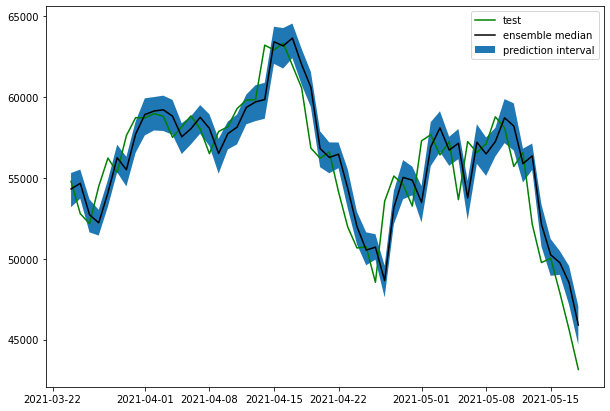

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)

offset=500
plt.figure(figsize=(10,7))
plt.plot(x_test.index[offset:], y_test[offset:], 'g', label='test')
plt.plot(x_test.index[offset:], ensemble_median[offset:], 'k-', label='ensemble median')
plt.fill_between(x_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label='prediction interval')
plt.legend()

In [ ]:
# train on full historical data to make predictions
x_all = bitcoin_prices_windowed.dropna().drop(['Price', 'block reward'], axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()
x_all[:5]

array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
        123.65499],
       [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
        125.455  ],
       [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
        108.58483],
       [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
        118.67466],
       [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
        121.33866]])

In [ ]:
# Turn data into tensors
features_dataset_all = tf.data.Dataset.from_tensor_slices(x_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all)).batch(1024).prefetch(tf.data.AUTOTUNE)
dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

model9 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(horizon)
], name='model_9_future_model')

model9.compile(loss='mae',
               optimizer='Adam')

model9.fit(dataset_all,
           epochs=100,
           verbose=0)

In [ ]:
# Future predictions
into_future = 14
def make_future_forecasts(values, model, into_future, window_size=window_size):
  future_forecast = []
  last_window = values[-window_size:]
  for _ in range(into_future):
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    future_forecast.append(tf.squeeze(future_pred).numpy())
    last_window = np.append(last_window, future_pred)[-window_size:]
  return future_forecast

In [ ]:
future_forecast = make_future_forecasts(y_all,
                                        model9,
                                        into_future,
                                        window_size)
future_forecast

[55764.473,
 50985.93,
 48522.96,
 48137.2,
 47880.633,
 46879.715,
 48227.594,
 53963.684,
 49685.543,
 47596.176,
 48114.418,
 48807.996,
 48623.85,
 50178.715]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  start_date = start_date + np.timedelta64(offset, "D")
  end_date = start_date + np.timedelta64(into_future, "D")
  return np.arange(start_date, end_date, dtype='datetime64[D]')

In [ ]:
last_timestamp = bitcoin_prices.index[-1]
next_timestep = get_future_dates(last_timestamp, into_future)
next_timestep

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
next_timestep = np.insert(next_timestep, 0, last_timestamp)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])

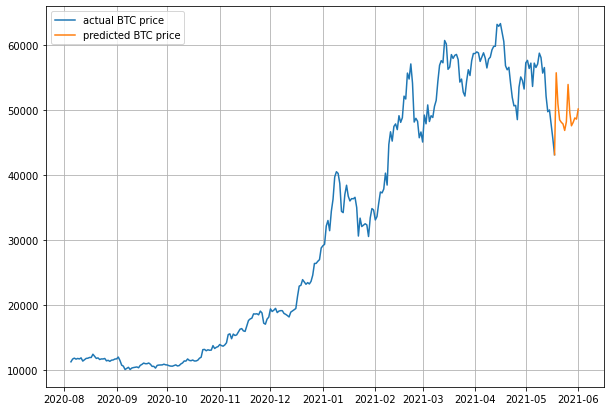

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format='-', label='actual BTC price')
plot_time_series(next_timestep, future_forecast, format='-', label='predicted BTC price')

In [ ]:
# turkey problem
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [ ]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[:-10]

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', ...,
       '2021-05-06T00:00:00.000000000', '2021-05-07T00:00:00.000000000',
       '2021-05-08T00:00:00.000000000'], dtype='datetime64[ns]')

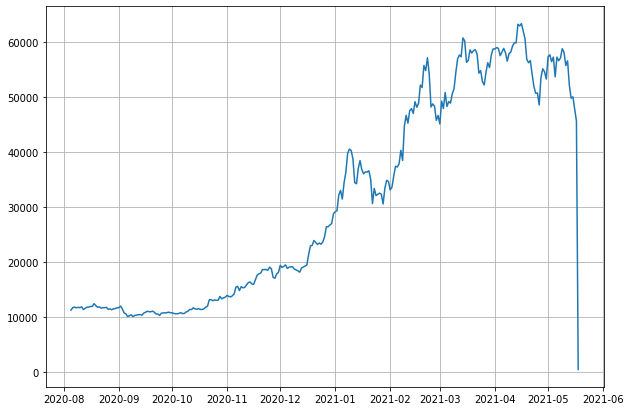

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(btc_timesteps_turkey, btc_price_turkey, format='-', start=2500)

In [ ]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size, horizon)
x_train, x_test, y_train, y_test = make_train_test_split(full_windows, full_labels)

In [ ]:
turkey_model = tf.keras.models.clone_model(model1)
turkey_model._name = 'model10_turkey_model'
turkey_model.compile(loss='mae',
                     optimizer='Adam')
turkey_model.fit(x_train,
                 y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(x_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
turkey_model = tf.keras.models.load_model('model_experiments/model10_turkey_model')
turkey_preds = make_preds(turkey_model, x_test)
turkey_results = evaluate_preds(y_test, turkey_preds)
turkey_results

{'mae': 17114.004,
 'mse': 613259460.0,
 'rsme': 23682.756,
 'mape': 121.13946,
 'mase': 26.483976}

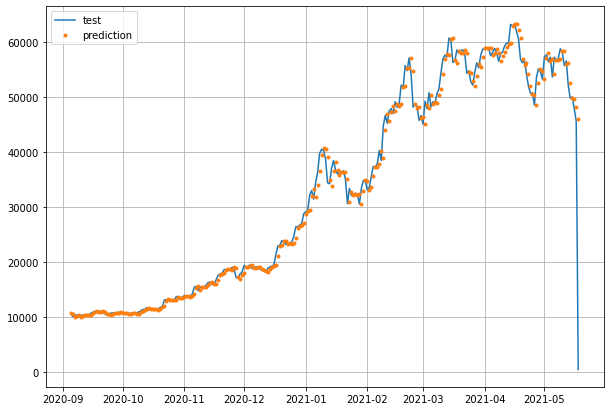

In [ ]:
plt.figure(figsize=(10,7))
offset=300
plot_time_series(btc_timesteps_turkey[-len(x_test):],
                 btc_price_turkey[-len(x_test):],
                 format='-',
                 label='test',
                 start=offset)
plot_time_series(btc_timesteps_turkey[-len(x_test):],
                 turkey_preds,
                 label='prediction',
                 start=offset)